# Objective Project

Pada project ini kita akan melakukan forecasting dari pengolahan data covid-19 di Indonesia dengan menerapkan metode Data Science.
Data ini diambil dari situs kawalcovid19.
Data diambil sebagian dari tanggal 1 Juli 2021 - 14 November 2021.

Langkah penerapan metode Data Science:
1. Business Understanding / Question
2. Data Collection
3. Data Preparation
4. Data Proccessing
5. Data Analysis

# Library Package

In [ ]:
#import semua package/library pada sel ini, jika butuh memasukkan package/library baru maka run ulang sel ini
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics
import matplotlib.pyplot as plt

# Data Preprocessing

1. Business Understanding / Question

Pada kesempatan kali ini kita ingin mengetahui bagaimana perkembangan kasus baru pada tanggal 15 Nov 2021 - 14 Des 2021 di Indonesia. Jika diasumsikan tidak adanya outbreak mendadak dan masuknya varian baru apakah kasusnya bisa menurun dan sejauh apa menurunnya. 

2. Data Collection 

Disini kita akan mencoba untuk mengumpulkan data yang kita butuhkan. Beruntungnya, kita sudah memiliki datanya dan hanya tinggal melakukan pemanggilan.

In [ ]:
df = pd.read_csv('covid_indonesia_2.csv')
df.tail()

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
132,2021-11-10,480,4249323,9537,531,4096194,14,143592
133,2021-11-11,435,4249758,9486,470,4096664,16,143608
134,2021-11-12,399,4250157,9305,560,4097224,20,143628
135,2021-11-13,359,4250516,9198,451,4097675,15,143643
136,2021-11-14,339,4250855,9018,503,4098178,16,143659


3. Data Preparation

Pada langkah ini kita akan menyiapkan data yang kita butuhkan. kita akan menggunakan dua kolom pada kesempatan kali ini yaitu total kasus dan tanggal. pertama kita lihat dulu detail dari dataset kita.

In [ ]:
df.describe()

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


lalu kita lihat tipe data dari semua kolom pada dataset

In [ ]:
df.dtypes

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

Karena yang akan kita gunakan adalah kolom tanggal sebagai time-series dan kasus harian sebagai input kita. maka kita perhatikan dua kolom tersebut.
Pada detail kasus harian terlihat nilai max dan min yang sangat jauh dengan 50% data berada di angka 5000 an. jauh dari rata-rata di 15000 an. sehingga kita perlu melakukan normalisasi pada kolom tersebut. Lalu karena mesin kita bekerja dengan numerik, maka kita akan ubah tanggal kita jadi numerik.

In [ ]:
#Normalisasi Kasus_harian dengan metode logaritmik
df[['case_norm']] = np.log(df[['Kasus_harian']])
df

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,case_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416
...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322


Setelah ini kita akan mengubah kolom tanggal menjadi kolom numerik dengan 1 Juli 2021 sebagai dasar. 
Artinya saya akan mengubah 

2021-07-01 menjadi 0, 

2021-07-02 menjadi 1,

dst.

In [ ]:
#membuat nilai variabel default_date menggunakan metode to_datetime
default_date = pd.to_datetime('2021-07-01')
print(f'nilai default_date adalah : {default_date}')

nilai default_date adalah : 2021-07-01 00:00:00


Sekarang kita akan membuat fungsi yang akan mengubah semua tanggal pada kolom menjadi numerik dengan basis pada tanggal 1 Juli 2021.

In [ ]:
#membuat kolom baru days memanfaatkan apply() dan lambda()
df['days'] = df['Tanggal'].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - default_date).days)
df

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,case_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


Langkah terakhir,
Kita akan membuat copy dari data yang kolom cases_norm dan days ke dalam dataframe baru.

In [ ]:
#membuat DataFrame baru berisikan feature case_norm dan days
data = pd.DataFrame(data=df, columns=['case_norm','days'])
data

,case_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


# Data Processing

4. Data Processing

Sekarang kita akan memproses data kita. Terdapat dua bagian, pertama adalah pembuatan model dan kedua adalah evaluasi sederhana.

In [ ]:
#pembuatan model

x = np.array(data['days']).reshape((-1,1))
y = np.array(data['case_norm'])

X_train, X_test, y_train, y_test = tts(x, y, random_state=32, test_size=0.2)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')

dimensi dari X_train : 109
dimensi dari y_train : 109
dimensi dari X_test : 28
dimensi dari y_test : 28


Sekarang kita akan membuat model kita. Kita akan menggunakan polynomial regression. perbedaannya dengan linear regression hanya pada bagian sebelum di set ke model linear regression kita akan ubah dulu dalam bentuk polynomial.

In [ ]:
#PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

#model Linear Regression
model_lr = lr()
model_lr.fit(X_poly, y_train)

LinearRegression()

Selanjutkan kita akan melakukan evaluasi model kita dengan membuat prediksi dari x_test kita lalu bandingkan hasilnya dengan y_test. cari nilai r_square.

In [ ]:
#prediksi data x_test
poly_x_test = poly_reg.fit_transform(X_test)

#variabel y_pred
y_pred = model_lr.predict(poly_x_test)
print(y_pred)

[ 8.79434911  7.57553155  6.43446413  8.9532002   7.14405408  5.50996744
 10.24165039  6.48669955  9.89270693 10.61682796  8.33783016  7.98768836
  9.25945311  9.82616182 10.36138312 10.33180773  8.03229093 10.56173213
 10.39071999  8.83441967 10.82767023  9.22200634  6.69325596  6.53869645
 10.53382642  9.58574035  7.29002664  9.47912467]


In [ ]:
#Evaluasi model
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9527044402995757


0.95 adalah angka yang baik. Sekarang kita lanjut untuk membuat prediksi data kita.
Ingat, di awal kita ingin memprediksi data kita 30 hari semenjak data terakhir.
buat numpy array dari 137 - 166

In [ ]:
#membuat variabel predict_date
i = 136
a = []
while i <= 165:
  i += 1
  a.append(i)

predict_date = np.array(a).reshape((-1,1))
predict_date

array([[137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
       [160],
       [161],
       [162],
       [163],
       [164],
       [165],
       [166]])

In [ ]:
#melakukan prediksi dengan berbasis predict_date
predict_x = poly_reg.fit_transform(predict_date)
predict_cases = model_lr.predict(predict_x)
print(predict_cases)

[5.39667112 5.33966517 5.28242069 5.22493768 5.16721615 5.1092561
 5.05105751 4.9926204  4.93394476 4.8750306  4.81587791 4.75648669
 4.69685695 4.63698868 4.57688188 4.51653656 4.45595271 4.39513033
 4.33406943 4.27277    4.21123204 4.14945556 4.08744055 4.02518701
 3.96269495 3.89996436 3.83699525 3.7737876  3.71034144 3.64665674]


# Summary/Report/Analysis

5. Data Analysis
Pada kesempatan kali ini kita akan melakukan analysis. Pertama dengan membuat grafik 30 hari kedepan. lalu menganalisis grafik dan model kita.

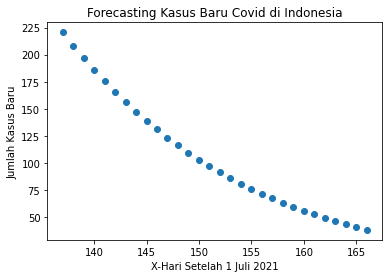

In [ ]:
#mengembalikan nilai asli dari logaritmik predict_case
true_predict_cases = np.exp(predict_cases)
true_predict_cases

#plot grafik predict_date
plt.scatter(predict_date, true_predict_cases)
plt.xlabel('X-Hari Setelah 1 Juli 2021')
plt.ylabel('Jumlah Kasus Baru')
plt.title('Forecasting Kasus Baru Covid di Indonesia')
plt.show()

Analisis:
1. Grafik prediksi menujukkan angka mengalami penurunan jumlah kasus baru untuk 30 hari kedepannya dengan rincian sekitar 15 hari setelah tanggal 14-11-2021 grafik penurunanya cukup tajam dan kemudian 15 hari selanjutnya lagi mulai mengalami grafik penurunan yang landai.

2. Secara umum polynomial regression dan model linear regression sama-sama termasuk kedalam model linear hanya saja pemilihan polynomial lebih disarankan penggunaanya saat menghadapi feature data yang distribusinya sangat jelas terlihat tidak normal secara statistiknya, hal ini bertujuan agar mesin tidak salah dalam mengerti dan memprediksi feature datanya. Selain itu secara visualisasi grafik polynomial regression tidak terlihat lurus, berbeda linear regression terlihat lurus.